# Time Series Decomposition and Autocorrelation Function in Power BI with Python
## Analytical Ants, LLC
### William Rodriguez 2025.01.08


- Full Article Here: [Analytical Ants, Time Series Decomposition and Autocorrelation Function in Power BI with Python](https://x.com/AnalyticalAnts/status/1876848539621335488)
- Overview: 
    - Follow all prerequisites ([Microsoft, Python and PowerBI Desktop](https://learn.microsoft.com/en-us/power-bi/connect-data/desktop-python-visuals)) 
    - PYTHON: Install Required Packages
        ```python
            pip install pandas matplotlib numpy statsmodels
        ```



## Time Series Decomposition (TSD)

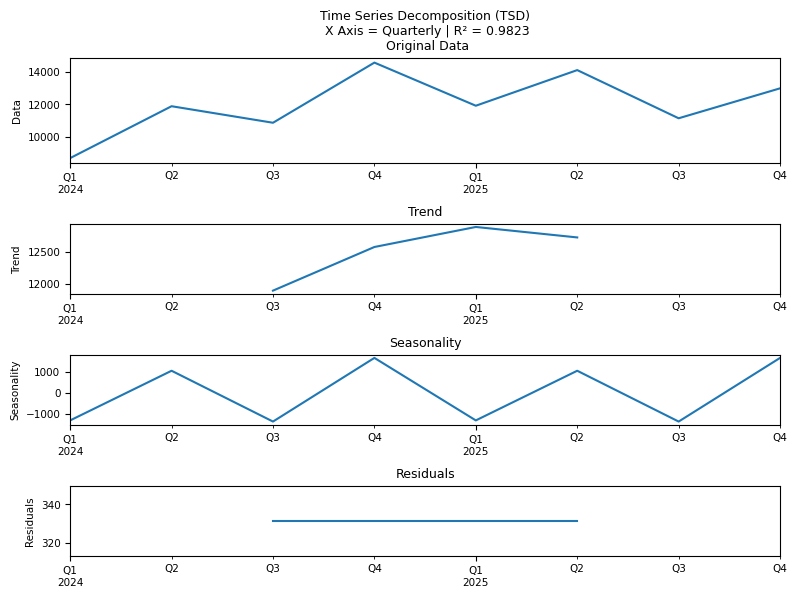

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tools.sm_exceptions import ValueWarning
import warnings
import numpy as np
import os

'''
In Power BI, assume the dataset looks like:
     0 - Date Column
     1 - Data Column
     2 - Selected Seasonality Column
'''
try:
    # If 'dataset' exists, we're likely in the Power BI environment
    df = dataset
except NameError:
    # If dataset does not exist, then run locally
    script_dir = os.getcwd()  # current working directory
    file_name = "Data - Quarterly.csv"
    file_path = os.path.join(script_dir, file_name)
    df = pd.read_csv(file_path)

# Identify column names
date_column = df.columns[0]          # e.g., "Monthly" or "Quarterly" date strings
data_column = df.columns[1]          # e.g., "SUM Data"
seasonality_column = df.columns[2]   # e.g., "Selected Seasonality"

# Clean Data
df[date_column] = pd.to_datetime(df[date_column]) # Convert date column to datetime
df.sort_values(date_column, inplace=True) # Sort by date just in case
df.set_index(date_column, inplace=True) # Set index to date column
# df[data_column] = df[data_column].fillna(method='ffill').fillna(method='bfill') # We can fill missing data if needed; your data might not have NA though
df[data_column] = df[data_column].fillna(df[data_column].mean())

# Grab the first "Selected Seasonality" from the dataset
selected_seasonality = df[seasonality_column].iloc[0]

# Dynamic Formatting
visual_width = 800  # Default width in pixels
visual_height = 600  # Default height in pixels
try: 
    if 'width' in dataset.columns and 'height' in dataset.columns:
        visual_width = dataset['width'].iloc[0]
        visual_height = dataset['height'].iloc[0]
except NameError:
    visual_width = 800 
    visual_height = 600 

# Aspect ratio scaling
aspect_ratio = visual_width / visual_height
base_size = min(visual_width, visual_height) / 100  # Scale based on smaller dimension
figsize = (base_size * aspect_ratio, base_size)

# Dynamic font scaling
font_scale = base_size / 8
plt.rcParams.update({'font.size': 10 * font_scale})

## ---------------------  TDS ---------------------

# Choose decomposition method based on data availability
if len(df) >= 2 * selected_seasonality:  # Check if we have at least two cycles
    result = seasonal_decompose(df[data_column], model='additive', period=selected_seasonality)
else:
    print("Using STL for decomposition due to insufficient cycles for traditional method.")
    result = STL(df[data_column], period=selected_seasonality).fit()

# Calculate R-squared
y = df[data_column]
y_hat = result.trend + result.seasonal
r_squared = 1 - (np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2))

# Plotting
fig, axes = plt.subplots(4, 1, figsize=figsize, gridspec_kw={'height_ratios': [1.5, 1, 1, 1]})

# Information for the first visual
x_axis_label = date_column  # Replace this with the selected X-axis granularity
title_info = f"Time Series Decomposition (TSD)\n X Axis = {x_axis_label} | R² = {r_squared:.4f}"

# Original data
axes[0].set_title(f'{title_info}\n Original Data')
result.observed.plot(ax=axes[0])
axes[0].set_ylabel(data_column)

# Trend component
axes[1].set_title('Trend')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')

# Seasonal component
axes[2].set_title('Seasonality')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonality')

# Residual component
axes[3].set_title('Residuals')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residuals')

for ax in axes:
    ax.set_xlabel("") 

plt.tight_layout()
plt.show()

## Autocorrelation Function (ACF)

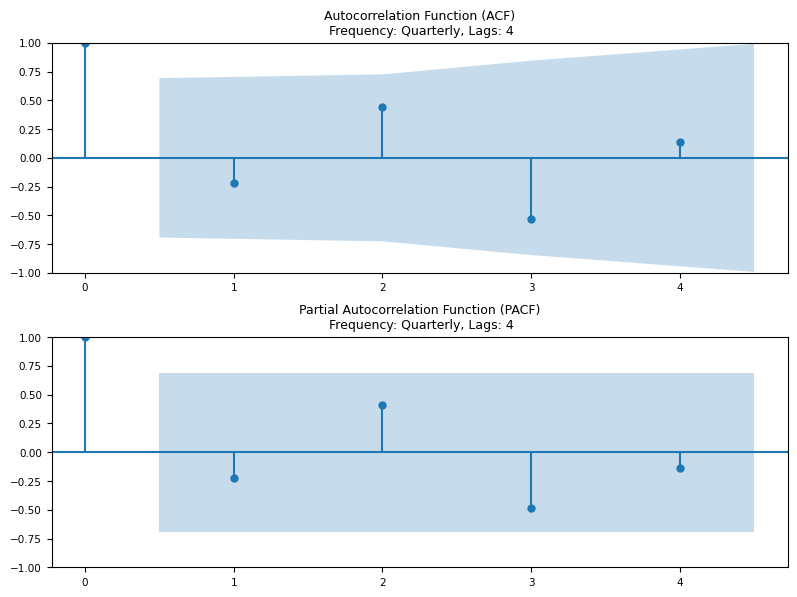

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tools.sm_exceptions import ValueWarning
import warnings
import numpy as np
import os

'''
In Power BI, assume the dataset looks like:
     0 - Date Column
     1 - Data Column
     2 - Selected Seasonality Column
'''
try:
    # If 'dataset' exists, we're likely in the Power BI environment
    df = dataset
except NameError:
    # If dataset does not exist, then run locally
    script_dir = os.getcwd()  # current working directory
    file_name = "Data - Quarterly.csv"
    file_path = os.path.join(script_dir, file_name)
    df = pd.read_csv(file_path)

# Identify column names
date_column = df.columns[0]          # e.g., "Monthly" or "Quarterly" date strings
data_column = df.columns[1]          # e.g., "SUM Data"
seasonality_column = df.columns[2]   # e.g., "Selected Seasonality"

# Clean Data
df[date_column] = pd.to_datetime(df[date_column]) # Convert date column to datetime
df.sort_values(date_column, inplace=True) # Sort by date just in case
df.set_index(date_column, inplace=True) # Set index to date column
# df[data_column] = df[data_column].fillna(method='ffill').fillna(method='bfill') # We can fill missing data if needed; your data might not have NA though
df[data_column] = df[data_column].fillna(df[data_column].mean())

# Grab the first "Selected Seasonality" from the dataset
selected_seasonality = df[seasonality_column].iloc[0]

# Dynamic Formatting
visual_width = 800  # Default width in pixels
visual_height = 600  # Default height in pixels
try: 
    if 'width' in dataset.columns and 'height' in dataset.columns:
        visual_width = dataset['width'].iloc[0]
        visual_height = dataset['height'].iloc[0]
except NameError:
    visual_width = 800 
    visual_height = 600 

# Aspect ratio scaling
aspect_ratio = visual_width / visual_height
base_size = min(visual_width, visual_height) / 100  # Scale based on smaller dimension
figsize = (base_size * aspect_ratio, base_size)

# Dynamic font scaling
font_scale = base_size / 8
plt.rcParams.update({'font.size': 10 * font_scale})

## ---------------------  ACF ---------------------

# Set relevant lags
if selected_seasonality == 365:
    frequency = 'Daily'
    max_lags = min(len(df)-1, 365)  # Last Year
elif selected_seasonality == 7:
    frequency = 'Weekly'
    max_lags = min(len(df)-1, 26)  # maybe ~6 months of weekly lags or up to 26
elif selected_seasonality == 12:
    frequency = 'Monthly'
    max_lags = min(len(df)-1, 12)  # up to 12 lags (1 year of monthly)
elif selected_seasonality == 4:
    frequency = 'Quarterly'
    max_lags = min(len(df)-1, 4)   # up to 4 lags (1 year of quarterly)
elif selected_seasonality == 1:
    frequency = 'Yearly'
    max_lags = 1
else:
    frequency = 'Unknown'
    max_lags = min(len(df)-1, 12)  # fallback

# Plot ACF and PACF
if len(df) > 1:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize ) #figsize=(15, 10))
    try:
        plot_acf(df[data_column], lags=max_lags, ax=ax1)
        ax1.set_title(f'Autocorrelation Function (ACF)\n Frequency: {frequency}, Lags: {max_lags}')

        plot_pacf(df[data_column], lags=max_lags, method='ywm', ax=ax2)
        ax2.set_title(f'Partial Autocorrelation Function (PACF)\n Frequency: {frequency}, Lags: {max_lags}')
    except ValueError as e:
        ax1.set_title(f'ACF Error: {e}')
        ax2.set_title(f'PACF Error: {e}')
else:
    print("Not enough data to calculate ACF or PACF.")

plt.tight_layout()
plt.show()
